In [ ]:
#exemplu suplimentar licenta

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [23]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from io import StringIO
np.random.seed(0)


In [82]:
imagine1=np.load('/content/gdrive/MyDrive/REZULTATE/NPY/S_CONSTANTA_20_09_2018/b41112_cropped_S_CT_2018_parte2.npy') #colt dreapta sus - constanta 2018
imagine2=np.load('/content/gdrive/MyDrive/REZULTATE/NPY/S_CONSTANTA_14_09_2020/b41112_cropped_S_CT_2020_parte2.npy') #colt dreapta sus - constanta 2020
imagine3=np.load('/content/gdrive/MyDrive/REZULTATE/NPY/S_CLUJ_30_08_2018/b41112_cropped_S_CJ_2018_parte3.npy') #colt stanga jos - cluj 2018
imagine4=np.load('/content/gdrive/MyDrive/REZULTATE/NPY/S_CLUJ_29_08_2020/b41112_cropped_S_CJ_2020_parte3.npy') #colt stanga jos - cluj 2020

In [83]:
print(imagine1.shape)
print(imagine2.shape)
print(imagine3.shape)
print(imagine4.shape)

(104991, 3)
(104991, 3)
(63956, 3)
(63956, 3)


In [84]:
for key in imagine1:
    if isinstance(imagine1[key], np.ndarray):
        imagine1[key] = imagine1[key].tolist()

d1 = pd.DataFrame(imagine1,columns=['R','G','B'])
#d1 = pd.DataFrame(imagine1,columns=['Values'])

for key in imagine2:
    if isinstance(imagine2[key], np.ndarray):
        imagine2[key] = imagine2[key].tolist()

d2 = pd.DataFrame(imagine2,columns=['R','G','B'])
#d2 = pd.DataFrame(imagine2,columns=['Values'])


for key in imagine3:
    if isinstance(imagine3[key], np.ndarray):
        imagine3[key] = imagine3[key].tolist()

d3 = pd.DataFrame(imagine3,columns=['R','G','B'])
#d3 = pd.DataFrame(imagine3,columns=['Values'])


for key in imagine4:
    if isinstance(imagine4[key], np.ndarray):
        imagine4[key] = imagine4[key].tolist()

d4 = pd.DataFrame(imagine4,columns=['R','G','B'])
#d4 = pd.DataFrame(imagine4,columns=['Values'])

In [85]:
len(d1)

104991

In [86]:
d1.head(5)

,R,G,B
0,0,0,197
1,0,0,198
2,0,0,197
3,0,0,198
4,14,0,198


In [87]:
d2.head(5)

,R,G,B
0,0,0,198
1,0,0,198
2,0,0,198
3,0,0,198
4,0,0,198


In [88]:
d3.head(5)

,R,G,B
0,120,89,145
1,124,99,125
2,120,95,121
3,116,92,124
4,117,86,123


In [89]:
d4.head(5)

,R,G,B
0,94,85,105
1,93,90,95
2,96,91,82
3,100,93,87
4,94,85,85


In [90]:
#o sa unim intre ele dataframe urile 
#https://www.geeksforgeeks.org/python-pandas-dataframe-append/#:~:text=append()%20function%20is%20used,are%20populated%20with%20NaN%20value.&text=ignore_index%20%3A%20If%20True%2C%20do%20not%20use%20the%20index%20labels.
#https://www.geeksforgeeks.org/how-to-combine-two-dataframe-in-python-pandas/#:~:text=Joining%20DataFrames&text=Another%20way%20to%20combine%20DataFrames,join%20key(s)”.
#df1.append(df2, ignore_index = True)
result=d1.append(d2,ignore_index=True)
len(result)
#168297 rows × 3 columns

209982

In [91]:
result1=result.append(d3,ignore_index=True)
len(result1)

273938

In [92]:
result2=result1.append(d4,ignore_index=True)
len(result2)

337894

In [93]:
#verificam numarul de linii si coloane cat si un header
result2.head(5)

,R,G,B
0,0,0,197
1,0,0,198
2,0,0,197
3,0,0,198
4,14,0,198


In [94]:
 #cream setul de antrenare
 result2['is_train'] = True
 result2.head(5)

,R,G,B,is_train
0,0,0,197,True
1,0,0,198,True
2,0,0,197,True
3,0,0,198,True
4,14,0,198,True


In [97]:
train = result2[result2['is_train']==True]
print("Number of observations in the training data",len(train))

Number of observations in the training data 337894


In [98]:
features = result2.columns[:3]
print(features)

Index(['R', 'G', 'B'], dtype='object')


In [99]:
masca1=np.load('/content/gdrive/MyDrive/REZULTATE/NPY/S_CONSTANTA_20_09_2018/masca_parte2.npy') #colt stanga sus - constanta 2018
masca2=np.load('/content/gdrive/MyDrive/REZULTATE/NPY/S_CONSTANTA_14_09_2020/masca_parte2.npy') #colt dreapta sus - constanta 2020
masca3=np.load('/content/gdrive/MyDrive/REZULTATE/NPY/S_CLUJ_30_08_2018/masca_S_CJ_2018_parte3.npy') #colt stanga jos - cluj 2018
masca4=np.load('/content/gdrive/MyDrive/REZULTATE/NPY/S_CLUJ_29_08_2020/masca_S_CJ_2020_parte3.npy') #colt dreapta jos - cluj 2020

In [100]:
for key in masca1:
    if isinstance(masca1[key], np.ndarray):
        masca1[key] = masca1[key].tolist()

m1 = pd.DataFrame(masca1,columns=['Values'])

for key in masca2:
    if isinstance(masca2[key], np.ndarray):
        mascae2[key] = masca2[key].tolist()

m2 = pd.DataFrame(masca2,columns=['Values'])

for key in masca3:
    if isinstance(masca3[key], np.ndarray):
        mascae3[key] = masca3[key].tolist()

m3 = pd.DataFrame(masca3,columns=['Values'])


for key in masca4:
    if isinstance(masca4[key], np.ndarray):
        imagine4[key] = masca4[key].tolist()

m4 = pd.DataFrame(masca4,columns=['Values'])

In [101]:
result3=m1.append(m2,ignore_index=True)
result4=result3.append(m3,ignore_index=True)
result5=result4.append(m4,ignore_index=True)

In [102]:
result5

,Values
0,0
1,0
2,0
3,0
4,0
...,...
337889,255
337890,255
337891,255
337892,255


In [103]:
#CREATING A RANDOM FOREST CLASSIFIER
clf = RandomForestClassifier(n_jobs=2, random_state=0,n_estimators=300)

#TRAINING THE CLASSIFIER
print(clf.fit(train[features],result5))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


In [180]:
#date test
date_test=np.load('/content/gdrive/MyDrive/REZULTATE/NPY/S_CONSTANTA_14_09_2020/b234_cropped_S_CT_2020.npy')
print(date_test.shape)

for key in date_test:
    if isinstance(date_test[key], np.ndarray):
        date_test[key] = date_test[key].tolist()

ds = pd.DataFrame(date_test,columns=['R','G','B'])
#ds = pd.DataFrame(date_test,columns=['values'])
ds.head(5)

(419078, 3)


,R,G,B
0,235,232,234
1,235,234,233
2,239,237,236
3,239,236,237
4,237,236,234


In [181]:
ds['is_testable'] = True
ds.head(5)

test = ds[ds['is_testable']==True]
print("Number of observations in the testing data",len(test))

Number of observations in the testing data 419078


In [182]:
features_test = ds.columns[:3]
print(features_test)
print(len(features_test))

Index(['R', 'G', 'B'], dtype='object')
3


In [183]:
y_pred=clf.predict(test[features_test])
#y_pred=clf.predict(date_test.reshape(-1,1))
print(y_pred) #afisarea predictiilor pe setul de test

[  0   0   0 ... 255 255 255]


In [184]:
masca_test=np.load('/content/gdrive/MyDrive/REZULTATE/NPY/S_CONSTANTA_14_09_2020/mask_S_CT_2020.npy')
print(masca_test.shape)

(419078,)


In [185]:
import sklearn.metrics as skm

y_pred = clf.predict(test[features_test])
#y_pred = clf.predict(date_test.reshape(-1,1))
print(len(y_pred))

419078


In [186]:
#y pred pentru antrenare
acc_test = skm.accuracy_score(masca_test, y_pred)
print(acc_test)

0.40279852437970975


In [187]:
y_pred1 = clf.predict(train[features])
#y pred pentru antrenare
acc_train = skm.accuracy_score(result5, y_pred1)
print(acc_train)

0.9636542821121417


In [188]:
y_pred.reshape([886,473]) #dimensiune constanta
#y_pred.reshape([472,544]) #dimensiune cluj [472,544]
#y_pred.reshape([5000,2000]) #dimensiune constanta mare
#y_pred.reshape([5490,5490]) #dimensiune cluj mare

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0, 255, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)

AttributeError: ignored

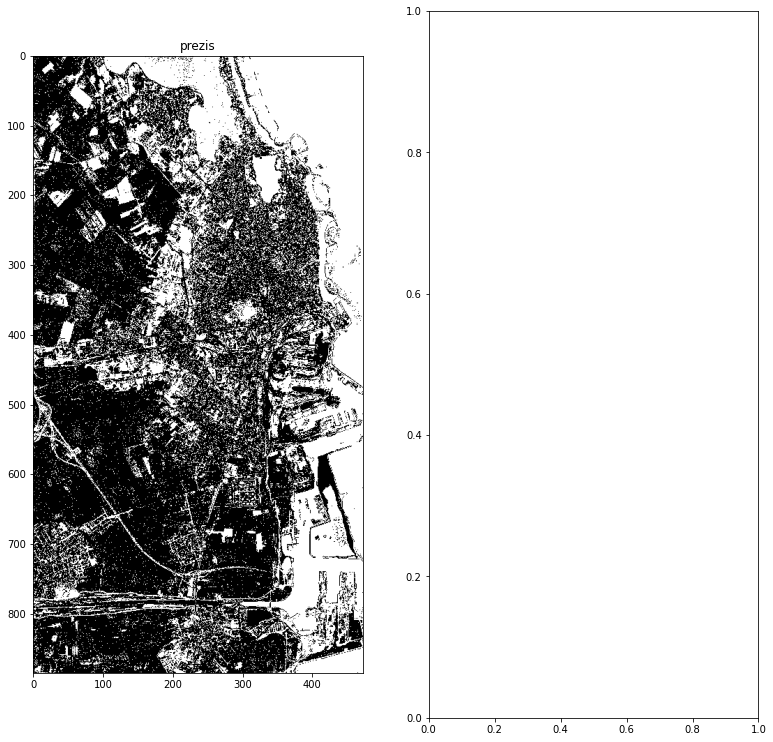

In [189]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(13,13))
plt.subplot(1,2,1)
#plt.imshow(y_pred.reshape([5490,5490]),cmap="gray") #cluj mare
#plt.imshow(y_pred.reshape([5000,2000]),cmap="gray") #constanta mare
#plt.imshow(y_pred.reshape([472,544]),cmap="gray") #cluj mic
plt.imshow(y_pred.reshape([886,473]),cmap="gray") #constanta mica
plt.title("prezis")
plt.subplot(1,2,2)
#plt.imshow(masca.reshape([5490,5490]),cmap="gray") #cluj mare
#plt.imshow(masca.reshape([5000,2000]),cmap="gray") #constanta mare
#plt.imshow(result5.reshape([472,544]),cmap="gray") #cluj mic
plt.imshow(result5.reshape([886,473]),cmap="gray")  #constanta mica
plt.title("corect")